# Process and visualize survey data

In [17]:
import pandas as pd
pilot_consent= pd.read_csv('C:/Users/lovel/Documents/PSYC201/Nummenmaa2013/data/pilot/survey/survey_pilot.csv')

# drop the unused column heads
pilot_consent.drop([0,1], inplace=True)

# exclude data from preview mode
pilot_consent=pilot_consent[pilot_consent.DistributionChannel!="preview"]
pilot_consent=pilot_consent[~pilot_consent.userID.str.contains("test")]

n_total= len(pilot_consent)
pilot_consent

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Eng_expenv_4,Eng_expenv_5,Eng_expenv_6,userID,DeviceIdentifier,AoA_lang1,AoA_lang2,AoA_lang3,AoA_lang4,AoA_lang5
2,2025-11-05 14:09:06,2025-11-05 14:14:22,0,69.196.46.17,100,316,1,2025-11-05 14:14:23,R_13xtjOjVGnDaVVV,NaN,...,0,10,10,5f5a5b9360d7fa1045aad5df,NaN,Chinese,Hokkien,English,German,NaN
3,2025-11-10 13:49:19,2025-11-10 13:57:05,0,69.196.44.229,100,465,1,2025-11-10 13:57:05,R_6cBBSy5WLEsp4P1,NaN,...,0,9,9,5f5a5b9360d7fa1045aad5ez,NaN,Spanish,English,NaN,NaN,NaN


In [20]:
# filter out unfinished ones
pilot_consent=pilot_consent[pilot_consent.Finished=="1"]

n_after_incomplete= len(pilot_consent)

#attention check screening
pilot_consent=pilot_consent[pilot_consent.Eng_langenv_4=="7 years"]
pilot_consent=pilot_consent[pilot_consent.Eng_learnev_5=="7"]

n_after_att_check= len(pilot_consent)

pilot_consent

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Eng_expenv_4,Eng_expenv_5,Eng_expenv_6,userID,DeviceIdentifier,AoA_lang1,AoA_lang2,AoA_lang3,AoA_lang4,AoA_lang5
2,2025-11-05 14:09:06,2025-11-05 14:14:22,0,69.196.46.17,100,316,1,2025-11-05 14:14:23,R_13xtjOjVGnDaVVV,NaN,...,0,10,10,5f5a5b9360d7fa1045aad5df,NaN,Chinese,Hokkien,English,German,NaN
3,2025-11-10 13:49:19,2025-11-10 13:57:05,0,69.196.44.229,100,465,1,2025-11-10 13:57:05,R_6cBBSy5WLEsp4P1,NaN,...,0,9,9,5f5a5b9360d7fa1045aad5ez,NaN,Spanish,English,NaN,NaN,NaN


                    Stage  N_Participants  N_Excluded
0                 Initial               2         0.0
1      After incompletion               2         0.0
2  After attention checks               2         0.0
3                   Final               2         NaN


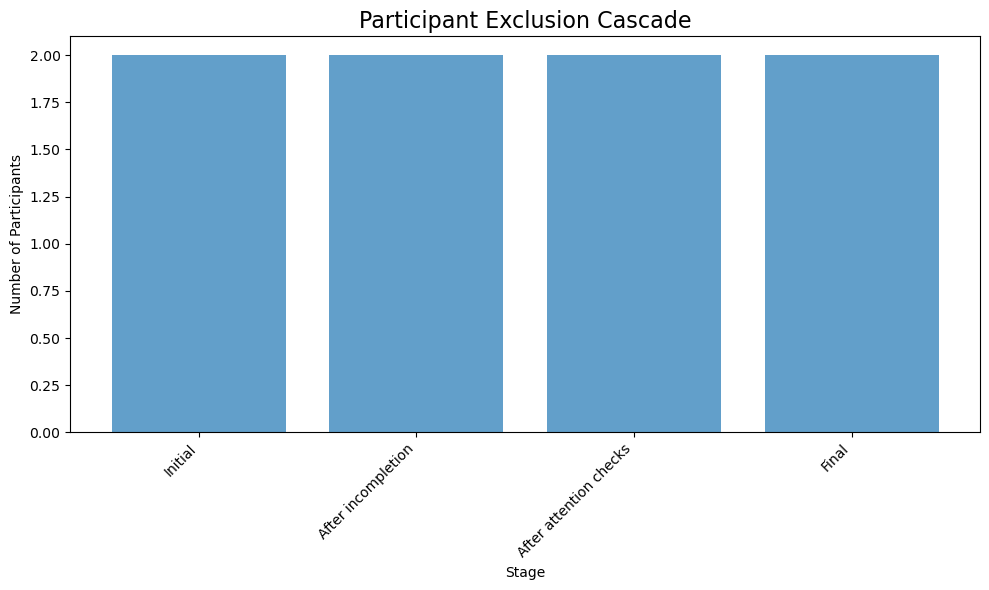

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# -----------------------------
# EXCLUSION SUMMARY TABLE
# -----------------------------
exclusion_summary = pd.DataFrame({
    "Stage": [
        "Initial",
        "After incompletion",
        "After attention checks",
        "Final"
    ],
    "N_Participants": [
        n_total,
        n_after_incomplete,
        n_after_att_check,
        n_after_att_check
    ],
    "N_Excluded": [
        0,
        n_total-n_after_incomplete,
        n_after_incomplete-n_after_att_check,
        None
    ]
})

print(exclusion_summary)

plt.figure(figsize=(10, 6))

stages = exclusion_summary["Stage"]
counts = exclusion_summary["N_Participants"]

plt.bar(stages, counts, alpha=0.7)

plt.title("Participant Exclusion Cascade", fontsize=16)
plt.xlabel("Exclusion stages")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

